In [50]:

lvl_root = 'gru_interpolation_32/'
files = !ls {lvl_root}*

linear_lvl_root = 'interpolations_32/'
linear_files = !ls {linear_lvl_root}*

files = [file.split('/')[1] for file in files]
linear_files = [file.split('/')[1] for file in linear_files]

files = list(set(files+linear_files))


by_game_pair = {}
for file in files:
    #file = file.split('/')[1]
    if len(file.split('-')) == 1:
        continue
    if '100%' in file:
        continue
    f1_2 = tuple(file.split('-')[:2])
    file1 = f1_2[0]
    file2 = f1_2[1]
    game_pair = (file1.split('_')[0],file2.split('_')[0])
    if game_pair not in by_game_pair:
        by_game_pair[game_pair] = []
    by_game_pair[game_pair].append((file1,file2))


In [59]:
import random 
pairings = []
for gp in by_game_pair:
    
    if gp[0] == gp[1]:
        continue
    
    file1,file2 = random.choice(by_game_pair[gp])
    pairings.append((file1,file2))
    
    



pairings = [('Metroid_1544.txt', 'Ninja Gaiden_4809.txt'), ('Mario_983.txt', 'Ninja Gaiden_3379.txt'), ('MegaMan_3315.txt', 'Ninja Gaiden_4877.txt'), ('Castlevania_1177.txt', 'MegaMan_5903.txt'), ('MegaMan_3315.txt', 'Metroid_1544.txt'), ('Castlevania_1996.txt', 'Ninja Gaiden_4361.txt'), ('Castlevania_1012.txt', 'Metroid_1544.txt'), ('Castlevania_1012.txt', 'Mario_5757.txt'), ('Mario_4594.txt', 'MegaMan_3343.txt'), ('Mario_3837.txt', 'Metroid_2570.txt')]

print(pairings)

[('Metroid_1544.txt', 'Ninja Gaiden_4809.txt'), ('Mario_983.txt', 'Ninja Gaiden_3379.txt'), ('MegaMan_3315.txt', 'Ninja Gaiden_4877.txt'), ('Castlevania_1177.txt', 'MegaMan_5903.txt'), ('MegaMan_3315.txt', 'Metroid_1544.txt'), ('Castlevania_1996.txt', 'Ninja Gaiden_4361.txt'), ('Castlevania_1012.txt', 'Metroid_1544.txt'), ('Castlevania_1012.txt', 'Mario_5757.txt'), ('Mario_4594.txt', 'MegaMan_3343.txt'), ('Mario_3837.txt', 'Metroid_2570.txt')]


In [60]:

common_vocab = {('breakable', 'solid'):'|', 
                ('climbable', 'solid'):'|', 
                ('climbable', 'passable','solid'):'|', 
                ('collectable',):'o', 
                ('collectable', 'powerup'):'*', 
                ('collectable', 'solid'):'Q', 
                ('hazard',):'v', 
                ('hazard', 'moving'):'e', 
                ('hazard', 'moving', 'solid'):'E', 
                ('hazard', 'moving', 'passable', 'solid'):'E', 
                ('hazard', 'null', 'solid'):'@', 
                ('hazard', 'solid'):'^', 
                ('moving', 'solid'):'#', 
                ('portal',):'$',  
                ('powerup', 'solid'):'!',
                ('solid',):'X'}
path_vocab = {'S':'Ś', 'E':'Ě', '-':'+', 'e':'ě', 'X':'Ǩ', '*':'★', 
              '|':'¦', '^':'⌅', 'v':'ѷ', '$':'§', 'o':'©'}

path2common = {p:n for n,p in path_vocab.items()}
print(path2common)
vocab2image = {'S':'Tiles/boxCrate_double',
               '|':'Tiles/ladderMid',
               'o':'Items/coinBronze',
               '*':'Items/star',
               'Q':'Tiles/boxCoin',
               '!':'Tiles/boxItem',
               'v':'Tiles/spikes',
               'e_air':'Enemies/bee',
               'e':'Enemies/snail',
               'E_air':'Enemies/bee',
               'E':'Enemies/snail',
               '^':'Enemies/saw',
               '#':'Tiles/bridgeB',
               '$':'Tiles/window',
               'Player':'Players/128x256/Green/alienGreen_walk1',
               'PlayerAir':'Players/128x256/Green/alienGreen_jump',
               'PlayerLadder':'Players/128x256/Green/alienGreen_climb1',
               
              }

{'Ś': 'S', 'Ě': 'E', '+': '-', 'ě': 'e', 'Ǩ': 'X', '★': '*', '¦': '|', '⌅': '^', 'ѷ': 'v', '§': '$', '©': 'o'}


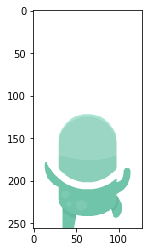

(256, 128, 4)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
root = 'PNG'
v2Image = {}
for v,i in vocab2image.items():
    im = np.array(Image.open(f'{root}/{i}.png'))
    v2Image[v] = im
    
plt.imshow(im)
plt.show()
print(im.shape)
cleared = set()

In [46]:

done = set()

In [66]:
import random
import imageio
        
groundMapping = {121:'Mid',
505:'Mid',
127:'Center',
511:'Center',
63:'Center',
511:'Center',
56:'Mid',
504:'Mid',
436:'Left',
209:'Mid',
216:'Right',
472:'Right',
473:'Right',
153:'Right',
152:'Right',
220:'Right',
28:'Right',
27:'Center',
24:'Right',
89:'Right',
221:'Right',
477:'Right',
88:'Right',
280:'Right',
345:'Right',
93:'Right',
25:'Right',
457:'Right',
476:'Right',
409:'Right',
408:'Right',
344:'Right',
284:'Right',
29:'Right',
156:'Right',
157:'Right',
432:'Left',
500:'Left',
497:'Left',
308:'Left',
48:'Left',
305:'Left',
52:'Left',
496:'Left',
49:'Left',
372:'Left',
112:'Left',
309:'Left',
433:'Left',
437:'Left',
304:'Left',
368:'Left',
373:'Left',
240:'Left',
176:'Left',
484:'Left',
180:'Left',
113:'Left',
244:'Left',
177:'Left',
501:'Left',
438:'Center',
508:'Mid',
509:'Mid',
445:'Mid',
248:'Mid',
380:'Mid',
120:'Mid',
316:'Mid',
441:'Mid',
249:'Mid',
208:'Mid',
125:'Mid',
312:'Mid',
444:'Mid',
124:'Mid',
440:'Mid',
377:'Mid',
144:'Mid',
184:'Mid',
448:'Mid',
61:'Mid',
57:'Mid',
317:'Mid',
60:'Mid',
400:'Mid',
488:'Mid',
313:'Mid',
349:'Mid',
116:'Mid',
489:'Mid',
404:'Mid',
401:'Mid',
145:'Mid',
464:'Mid',
465:'Mid',
381:'Mid',
376:'Mid',
252:'Mid',
253:'Mid',
189:'Mid',
148:'Mid',
188:'Mid',
468:'Mid',
469:'Mid',
16:'',
17:'',
20:'',
21:'',
80:'',
81:'',
84:'',
85:'',
272:'',
273:'',
276:'',
277:'',
336:'',
337:'',
340:'',
341:'',                 
151:'Center',
255:'Center',
223:'Center',
219:'Center',
281:'Mid',
439:'Center',
319:'Center',
475:'Center',
146:'Center',
54:'Center',
18:'Center',
443:'Center',
502:'Center',
310:'Center',
447:'Center',
311:'Center',
250:'Center',
55:'Center',
479:'Center',
315:'Center',
503:'Center',
467:'Center',
471:'Center',
191:'Center',
31:'Center',
351:'Center',
23:'Center',
91:'Center',
95:'Center',
383:'Center',
155:'Center',
506:'Center',
274:'Center',
19:'Center',
182:'Center',
150:'Center',
275:'Center',
218:'Center',
442:'Center',
466:'Center',
58:'Center',
314:'Center',
246:'Center',
407:'Center',
402:'Center',
498:'Center',
247:'Center',
470:'Center',
119:'Center',
22:'Center',
87:'Center',
210:'Center',
159:'Center',
186:'Center',
147:'Center',
211:'Center',
183:'Center',
214:'Center',
415:'Center',
406:'Center',
375:'Center',
374:'Center',
287:'Center',
347:'Center',
338:'Center',
215:'Center',
403:'Center',
83:'Center',
279:'Center',378:'Center',
474:'Corner_right',
30:'Corner_right',
62:'Corner_right',
254:'Corner_right',
90:'Corner_right',
510:'Corner_right',
446:'Corner_right',
350:'Corner_right',
222:'Corner_right',
286:'Corner_right',
179:'Corner_right',
26:'Corner_right',
318:'Corner_right',
382:'Corner_right',
282:'Corner_right',
478:'Corner_right',
158:'Corner_right',
190:'Corner_right',
94:'Corner_right',
126:'Corner_right',154:'Corner_right',
507:'Corner_left',
251:'Corner_left',
123:'Corner_left',
178:'Corner_left',
187:'Corner_left',
434:'Corner_left',
499:'Corner_left',
50:'Corner_left',
306:'Corner_left',
435:'Corner_left',
242:'Corner_left',
59:'Corner_left',
                 379:'Corner_left',
                 217:'Right'
    }

g2Image = {}
root = 'PNG/Ground/Grass/grass'
for m in groundMapping.values():
    if m in g2Image:
        continue
    else:
        g2Image[m] = np.array(Image.open(f'{root}{m}.png'))
        
for lvl_root in ['gru_interpolation_32/']:
    for (file1,file2) in pairings:
        print(file1,file2)
        files = [f'{lvl_root}{file1}-{file2}-{p}%.txt' for p in range(25,100,25)]
        files += [f'{lvl_root}{file1}-100%.txt',f'{lvl_root}{file2}-100%.txt']
        files = [(file1,file2,p) for  p in range(25,100,25)]
        files += [(file1,100),(file2,100)]
        for f_params in files:
            
            level = []
            try:
                if len(f_params) == 3:
                    file = f'{lvl_root}{file1}-{file2}-{f_params[2]}%.txt'
                else:
                    file = f'{lvl_root}{f_params[0]}-{f_params[1]}%.txt'
                    
                if file in done:
                    continue
                
                with open(file) as infile:
                    for line in infile:
                        level.append(line.rstrip())
            except:
                if len(f_params) == 3:
                    file = f'{lvl_root}{file2}-{file1}-{f_params[2]}%.txt'
                else:
                    file = f'{lvl_root}{f_params[0]}-{f_params[1]}%.txt'
                    
                if file in done:
                    continue
                
                with open(file) as infile:
                    for line in infile:
                        level.append(line.rstrip())
                
            levelMap = {}
            for yy,row in enumerate(level):
                for xx,tile in enumerate(row):
                    levelMap[(xx,yy)] = tile
            seen = set()
            seen |= set(groundMapping.keys())
            def loc2tile(xx,yy):
                index = 0
                ii = 0
                snippet = ''
                for yy_ in [yy-1,yy,yy+1]:
                    for xx_ in [xx-1,xx,xx+1]:

                        loc = (xx_,yy_)
                        if levelMap.get(loc,'X') == 'X': 
                            index += 2**ii
                        snippet += levelMap.get(loc,'@')
                        ii += 1
                    snippet += '\n'
                if index not in seen:
                    print(xx,yy)
                    print(index)
                    print(snippet,'\n')
                seen.add(index)
                return groundMapping[index]
            width = len(level[0])
            height = len(level)
            pix = 128

            output_image = np.zeros((pix*height,pix*width,4))
            path_image = np.zeros((pix*height,pix*width,4))
            for yy,row in enumerate(reversed(level)):
                yy = height-yy-1
                for xx,tile in enumerate(row):
                    has_path = False

                    if tile in path2common:
                        has_path = True
                        tile = path2common[tile]
                    if tile == '-':
                        pass
                    else:
                        if tile == 'X':
                            d = g2Image.get(loc2tile(xx,yy),'Mid')
                            if d.shape[2] == 4:
                                output_image[yy*pix:(yy+1)*pix,
                                             xx*pix:(xx+1)*pix,:] = g2Image[loc2tile(xx,yy)]
                            else:
                                output_image[yy*pix:(yy+1)*pix,
                                             xx*pix:(xx+1)*pix,:3] = g2Image[loc2tile(xx,yy)]
                                output_image[yy*pix:(yy+1)*pix,
                                             xx*pix:(xx+1)*pix,3] = 255
                        else:
                            if tile in ['E','e']:
                                if levelMap.get((xx,yy+1),'@') != 'X':
                                    tile += '_air'
                            output_image[yy*pix:(yy+1)*pix,
                                         xx*pix:(xx+1)*pix,:] = v2Image[tile]
                    if has_path:
                        mode = 'Air'

                        if levelMap.get((xx,yy)) in ['|','¦']:
                            mode = 'Ladder'
                        elif levelMap.get((xx,yy+1),'-') in ['S','|','Q','^','#','!','¦','Ś','Ǩ','X','⌅']:
                            mode = ''
                        if yy == 0:
                            path_image[(yy)*pix:(yy+1)*pix,
                                        xx*pix:(xx+1)*pix,:] = v2Image['Player'+mode][pix:,:,:]                
                        else:
                            path_image[(yy-1)*pix:(yy+1)*pix,
                                        xx*pix:(xx+1)*pix,:] = v2Image['Player'+mode]


            mask = np.array(path_image[:,:,3] == 0,np.float)
            m = 0.25
            mask[mask<1] = m
            mask = mask.reshape(mask.shape[0],mask.shape[1],1)
            mask = np.concatenate((mask,mask,mask,mask),axis=2)
            composite_image = output_image.copy()

            composite_path = path_image.copy()
            composite_image = composite_image*(mask) + composite_path*(1-mask)
            alpha = composite_image[:,:,3]
            alpha[(composite_image[:,:,3]> 0)] = 255
            composite_image[:,:,3] = alpha
            background = np.array(Image.open('./PNG/Backgrounds/blue_grass.png').resize(composite_path.shape[1::-1], Image.BILINEAR))

            mask = (255-composite_image[:,:,-1]).reshape(mask.shape[0],mask.shape[1],1)/255.0
            mask = np.concatenate((mask,mask,mask,mask),axis=2)
            composite_image = background*mask +composite_image
            print('writing to ',f'{file[:-5]}.png' )
            imageio.imwrite(f'{file[:-5]}.png', composite_image[:,:,:3])
            done.add(file)

Metroid_1544.txt Ninja Gaiden_4809.txt
Mario_983.txt Ninja Gaiden_3379.txt
MegaMan_3315.txt Ninja Gaiden_4877.txt
Castlevania_1177.txt MegaMan_5903.txt
MegaMan_3315.txt Metroid_1544.txt


writing to  gru_interpolation_32/MegaMan_3315.txt-Metroid_1544.txt-50.png


writing to  gru_interpolation_32/MegaMan_3315.txt-Metroid_1544.txt-75.png
Castlevania_1996.txt Ninja Gaiden_4361.txt


writing to  gru_interpolation_32/Castlevania_1996.txt-Ninja Gaiden_4361.txt-25.png
writing to  gru_interpolation_32/Castlevania_1996.txt-Ninja Gaiden_4361.txt-50.png


writing to  gru_interpolation_32/Castlevania_1996.txt-Ninja Gaiden_4361.txt-75.png


writing to  gru_interpolation_32/Castlevania_1996.txt-100.png
writing to  gru_interpolation_32/Ninja Gaiden_4361.txt-100.png


Castlevania_1012.txt Metroid_1544.txt


writing to  gru_interpolation_32/Castlevania_1012.txt-Metroid_1544.txt-25.png


writing to  gru_interpolation_32/Castlevania_1012.txt-Metroid_1544.txt-50.png
writing to  gru_interpolation_32/Castlevania_1012.txt-Metroid_1544.txt-75.png


writing to  gru_interpolation_32/Castlevania_1012.txt-100.png


Castlevania_1012.txt Mario_5757.txt


writing to  gru_interpolation_32/Castlevania_1012.txt-Mario_5757.txt-25.png


writing to  gru_interpolation_32/Castlevania_1012.txt-Mario_5757.txt-50.png


writing to  gru_interpolation_32/Castlevania_1012.txt-Mario_5757.txt-75.png


writing to  gru_interpolation_32/Mario_5757.txt-100.png
Mario_4594.txt MegaMan_3343.txt
Mario_3837.txt Metroid_2570.txt


writing to  gru_interpolation_32/Mario_3837.txt-Metroid_2570.txt-25.png


writing to  gru_interpolation_32/Mario_3837.txt-Metroid_2570.txt-50.png


writing to  gru_interpolation_32/Mario_3837.txt-Metroid_2570.txt-75.png


writing to  gru_interpolation_32/Mario_3837.txt-100.png
writing to  gru_interpolation_32/Metroid_2570.txt-100.png
